In [1]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter

In [45]:
def CNOT(circuit, control, target):
    angle = Parameter('angle569')
    circuit.ry(0.5, control)
    circuit.rxx(0.5, control, target)
    circuit.sxdg(control)
    circuit.sxdg(target)
    circuit.ry(0.5, control)

def CRy(circuit, control, target, angle):
    """Controlled Y rotation."""
    circuit.ry(-angle / 2, target) #ry
    CNOT(circuit, control, target)
    circuit.ry(-angle / 2, target)
    CNOT(circuit, control, target)
    circuit.ry(angle, target)


def qmarina(thetas: list[Parameter]):
    qr1 = QuantumRegister(1, '')
    qr2 = QuantumRegister(1, 'emitter 1')
    qr3 = QuantumRegister(1, 'emitter 2')
    qr4 = QuantumRegister(1, 'emitter 3')
    circuit = QuantumCircuit(qr1, qr2, qr3, qr4)
    circuit.x(1)

    # first emitter is handled oppositely from the others
    CRy(circuit, qr2, qr1, thetas[0])  # rotate environment with 1st emitter as control
    CNOT(circuit, qr1, qr2)  # CNOT on 1st emitter with environment as control

    CRy(circuit, qr1, qr3, thetas[1])  # rotate ith emitter with environment as control
    CNOT(circuit, qr3, qr1)  # CNOT on environment with ith emitter as control
    CRy(circuit, qr1, qr4, thetas[2])  # rotate ith emitter with environment as control
    CNOT(circuit, qr4, qr1)  # CNOT on environment with ith emitter as control
    
    return circuit

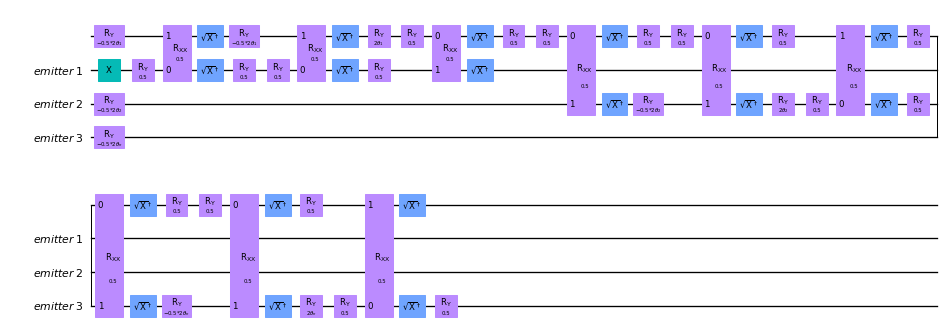

In [47]:
qr1 = QuantumRegister(1, '')
qr2 = QuantumRegister(1, 'emitter 1')
qr3 = QuantumRegister(1, 'emitter 2')
qr4 = QuantumRegister(1, 'emitter 3')


thetas = []

theta_1 = Parameter(r'$2\theta_1$')
theta_2 = Parameter(r'2$\theta_2$')
theta_n = Parameter(r'2$\theta_n$')

thetas.append(theta_1)
thetas.append(theta_2)
thetas.append(theta_n)

circuit = qmarina(thetas=thetas)

# circuit.measure_all()

fig, ax = plt.subplots(figsize=(12, 6))
circuit.draw(output="mpl", ax=ax, scale=3)

# Qiskit has an issue creating qubit labels that contain linebreaks.
# The linebreak renders, but the label is wrapped in ${}$.
# As a workaround, we'll just manually insert the label for the
# qubit representing the "cavity and environment"

# ax.text(
#     0.2,
#     -0.25,
#     "cavity and\nenvironment",
#     fontsize=10,
#     color='black',
#     fontstyle='italic',
#     horizontalalignment='right',
#     zorder=50,
#     bbox=dict(facecolor='white', alpha=1, edgecolor='none'),
# )

# plt.tight_layout()

# # there is some excess white margin on the left side of the figure once exported
# # let's trim that off
# pos = ax.get_position()
# new_pos = [pos.x0 - 0.03, pos.y0,  pos.width, pos.height]
# ax.set_position(new_pos)

In [ ]:
fig.savefig("../figures/QSCOUT_QMARINA_circuit.eps")

In [ ]:
qr1 = QuantumRegister(1, '')
qr2 = QuantumRegister(1, 'emitter 1')
qr3 = QuantumRegister(1, 'emitter 2')
qr4 = QuantumRegister(1, 'emitter 3')


thetas = []

theta_1 = Parameter(r'$2\theta_1$')
theta_2 = Parameter(r'2$\theta_2$')
theta_n = Parameter(r'2$\theta_n$')

thetas.append(theta_1)
thetas.append(theta_2)
thetas.append(theta_n)



fig, ax = plt.subplots(figsize=(12, 6))
circuit.draw(output="mpl", ax=ax, scale=3)

# Qiskit has an issue creating qubit labels that contain linebreaks.
# The linebreak renders, but the label is wrapped in ${}$.
# As a workaround, we'll just manually insert the label for the
# qubit representing the "cavity and environment"

# ax.text(
#     0.2,
#     -0.25,
#     "cavity and\nenvironment",
#     fontsize=10,
#     color='black',
#     fontstyle='italic',
#     horizontalalignment='right',
#     zorder=50,
#     bbox=dict(facecolor='white', alpha=1, edgecolor='none'),
# )

# plt.tight_layout()

# # there is some excess white margin on the left side of the figure once exported
# # let's trim that off
# pos = ax.get_position()
# new_pos = [pos.x0 - 0.03, pos.y0,  pos.width, pos.height]
# ax.set_position(new_pos)